In [1]:
#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
df=pd.read_csv('Tweets.csv')

In [3]:
df.shape

(14640, 15)

In [4]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703061e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,5.703011e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,5.703011e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,5.703008e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  float64
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [6]:
#finding the missing values
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [7]:
df.nunique()

tweet_id                        14484
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                   14247
tweet_location                   3022
user_timezone                      85
dtype: int64

In [8]:
#we already got to know that there are many missing or null value
#but we will handle it later

In [9]:
#preprocessing of data
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703061e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,5.703011e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,5.703011e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,5.703008e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,5.695877e+17,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,5.695874e+17,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,5.695872e+17,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,5.695872e+17,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [10]:
#'tweet_created'-->column has date and time data in that but its present in the form of object
#so we have to change it into date and time

In [11]:
df['tweet_created']=pd.to_datetime(df['tweet_created']).dt.date

In [12]:
df['tweet_created']=pd.to_datetime(df['tweet_created'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   tweet_id                      14640 non-null  float64       
 1   airline_sentiment             14640 non-null  object        
 2   airline_sentiment_confidence  14640 non-null  float64       
 3   negativereason                9178 non-null   object        
 4   negativereason_confidence     10522 non-null  float64       
 5   airline                       14640 non-null  object        
 6   airline_sentiment_gold        40 non-null     object        
 7   name                          14640 non-null  object        
 8   negativereason_gold           32 non-null     object        
 9   retweet_count                 14640 non-null  int64         
 10  text                          14640 non-null  object        
 11  tweet_coord                 

In [14]:
#the data is given to us from which date to which date

In [15]:
df['tweet_created'].min()

Timestamp('2015-02-16 00:00:00')

In [16]:
df['tweet_created'].max()

Timestamp('2015-02-24 00:00:00')

In [17]:
#the tweets data is given to us from 16 th feb 2015 to 24 th feb 2015

In [18]:
df['tweet_created'].nunique()

9

In [19]:
df_date=df['tweet_created'].value_counts()
df_date

2015-02-22    3079
2015-02-23    3028
2015-02-21    1557
2015-02-20    1500
2015-02-17    1408
2015-02-19    1376
2015-02-24    1344
2015-02-18    1344
2015-02-16       4
Name: tweet_created, dtype: int64

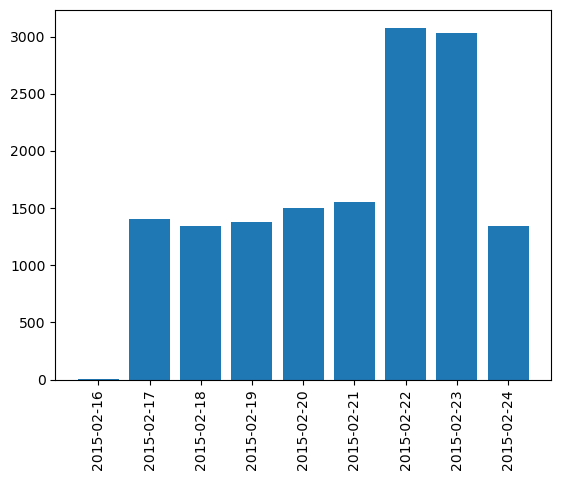

In [20]:
plt.bar(df_date.index,df_date.values)
plt.xticks(rotation=90)
plt.show()

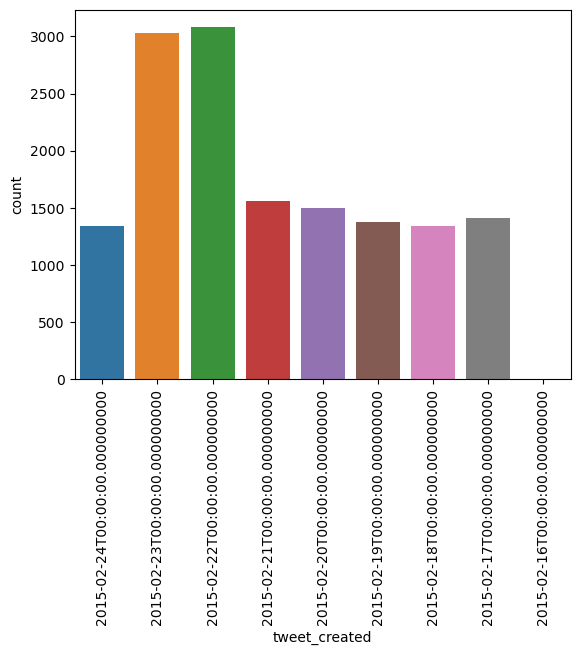

In [21]:
sns.countplot(x=df['tweet_created'])
plt.xticks(rotation=90)
plt.show()

In [22]:
#in the above graph we are seeing the number of tweets on each day
#on day 22nd and 23rd-->most numbers of tweets are done

In [23]:
df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [24]:
#shall we drop the tweet_id column
df.drop('tweet_id',axis=1,inplace=True)

In [25]:
df.isnull().sum()

airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [26]:
#as we can see that-->airline_sentiment_gold , negativereason_gold , tweet_coord -- has approximately 90% of the data missing
#so we cannot manipulate the data, hence we are dropping all three columns

In [27]:
df.drop(['airline_sentiment_gold','negativereason_gold','tweet_coord'],axis=1,inplace=True)

In [28]:
df.isnull().sum()

airline_sentiment                  0
airline_sentiment_confidence       0
negativereason                  5462
negativereason_confidence       4118
airline                            0
name                               0
retweet_count                      0
text                               0
tweet_created                      0
tweet_location                  4733
user_timezone                   4820
dtype: int64

In [29]:
df['negativereason'].value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

In [30]:
df.isnull().sum()

airline_sentiment                  0
airline_sentiment_confidence       0
negativereason                  5462
negativereason_confidence       4118
airline                            0
name                               0
retweet_count                      0
text                               0
tweet_created                      0
tweet_location                  4733
user_timezone                   4820
dtype: int64

In [31]:
#if we are going to fill the missing values in 'negativereason' feature with-->'Customer Service Issue'
#which means for some of the positive feedback, we are stating the 'Customer Service Issue' reason 
#which is a mismatch with my positive feedback

In [32]:
#EDA- Exploratory data analysis
df

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24,NaN,Eastern Time (US & Canada)
1,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24,NaN,Pacific Time (US & Canada)
2,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24,Lets Play,Central Time (US & Canada)
3,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24,NaN,Pacific Time (US & Canada)
4,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...
14635,positive,0.3487,NaN,0.0000,American,KristenReenders,0,@AmericanAir thank you we got on a different f...,2015-02-22,NaN,NaN
14636,negative,1.0000,Customer Service Issue,1.0000,American,itsropes,0,@AmericanAir leaving over 20 minutes Late Flig...,2015-02-22,Texas,NaN
14637,neutral,1.0000,NaN,NaN,American,sanyabun,0,@AmericanAir Please bring American Airlines to...,2015-02-22,"Nigeria,lagos",NaN
14638,negative,1.0000,Customer Service Issue,0.6659,American,SraJackson,0,"@AmericanAir you have my money, you change my ...",2015-02-22,New Jersey,Eastern Time (US & Canada)


In [33]:
df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

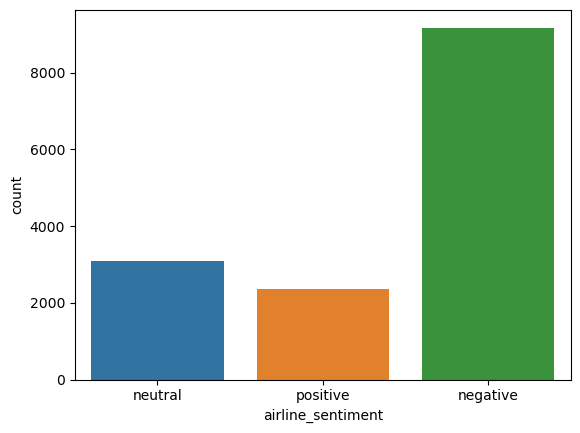

In [34]:
sns.countplot(x=df['airline_sentiment'])
plt.show()

In [35]:
df

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24,NaN,Eastern Time (US & Canada)
1,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24,NaN,Pacific Time (US & Canada)
2,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24,Lets Play,Central Time (US & Canada)
3,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24,NaN,Pacific Time (US & Canada)
4,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...
14635,positive,0.3487,NaN,0.0000,American,KristenReenders,0,@AmericanAir thank you we got on a different f...,2015-02-22,NaN,NaN
14636,negative,1.0000,Customer Service Issue,1.0000,American,itsropes,0,@AmericanAir leaving over 20 minutes Late Flig...,2015-02-22,Texas,NaN
14637,neutral,1.0000,NaN,NaN,American,sanyabun,0,@AmericanAir Please bring American Airlines to...,2015-02-22,"Nigeria,lagos",NaN
14638,negative,1.0000,Customer Service Issue,0.6659,American,SraJackson,0,"@AmericanAir you have my money, you change my ...",2015-02-22,New Jersey,Eastern Time (US & Canada)


In [36]:
df['airline'].nunique()

6

In [37]:
df['airline'].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

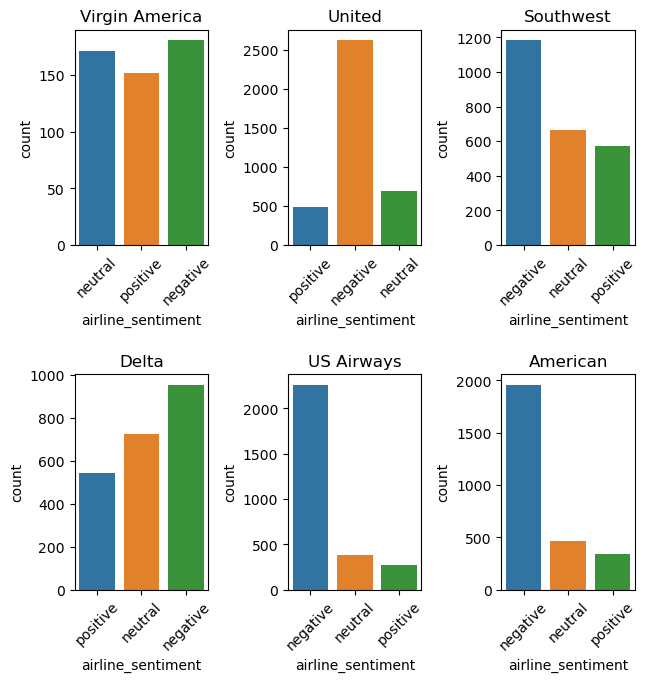

In [38]:
plt.figure(figsize=(7,7))

plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.6,hspace=0.6)

plt.subplot(2,3,1)
plt.title('Virgin America')
plt.xticks(rotation=45)
sns.countplot(x=df[df['airline']=='Virgin America']['airline_sentiment'])

plt.subplot(2,3,2)
plt.title('United')
plt.xticks(rotation=45)
sns.countplot(x=df[df['airline']=='United']['airline_sentiment'])

plt.subplot(2,3,3)
plt.title('Southwest')
plt.xticks(rotation=45)
sns.countplot(x=df[df['airline']=='Southwest']['airline_sentiment'])

plt.subplot(2,3,4)
plt.title('Delta')
plt.xticks(rotation=45)
sns.countplot(x=df[df['airline']=='Delta']['airline_sentiment'])

plt.subplot(2,3,5)
plt.title('US Airways')
plt.xticks(rotation=45)
sns.countplot(x=df[df['airline']=='US Airways']['airline_sentiment'])

plt.subplot(2,3,6)
plt.title('American')
plt.xticks(rotation=45)
sns.countplot(x=df[df['airline']=='American']['airline_sentiment'])

plt.show()

In [40]:
#from the above graph we got the information that the people are not at all happy with the airlines
#percentage of negative reviews for each US AIRLINE is very high expent Virgin America
#in terms of percentage how many percent we have negative feedback/tweets
data_neg=df.groupby(['airline','airline_sentiment']).count().iloc[:,0]
total_tweet=df.groupby(['airline'])['airline_sentiment'].count()

In [41]:
#eisme hamne pure column mai sai sirf first column liya hai
data_neg

airline         airline_sentiment
American        negative             1960
                neutral               463
                positive              336
Delta           negative              955
                neutral               723
                positive              544
Southwest       negative             1186
                neutral               664
                positive              570
US Airways      negative             2263
                neutral               381
                positive              269
United          negative             2633
                neutral               697
                positive              492
Virgin America  negative              181
                neutral               171
                positive              152
Name: airline_sentiment_confidence, dtype: int64

In [42]:
#eisme hamne bass different airline ko group by mai liya hai aur positive,negative aur neutral ka total sum kiya hai
total_tweet

airline
American          2759
Delta             2222
Southwest         2420
US Airways        2913
United            3822
Virgin America     504
Name: airline_sentiment, dtype: int64

In [43]:
#hamne bass 0,3,6,9,12,15 ko eisliye liya hai kyuki hamay negative tweet ka percentage chaiye
print('American',np.round((data_neg[0]/total_tweet[0])*100))
print('Delta',np.round((data_neg[3]/total_tweet[1])*100))
print('Southwest',np.round((data_neg[6]/total_tweet[2])*100))
print('US Airways',np.round((data_neg[9]/total_tweet[3])*100))
print('United',np.round((data_neg[12]/total_tweet[4])*100))
print('Virgin America',np.round((data_neg[15]/total_tweet[5])*100))

American 71.0
Delta 43.0
Southwest 49.0
US Airways 78.0
United 69.0
Virgin America 36.0


In [44]:
#the people are really having negative reviews in higher proportion for -->American, US Airways, United

<Axes: xlabel='airline'>

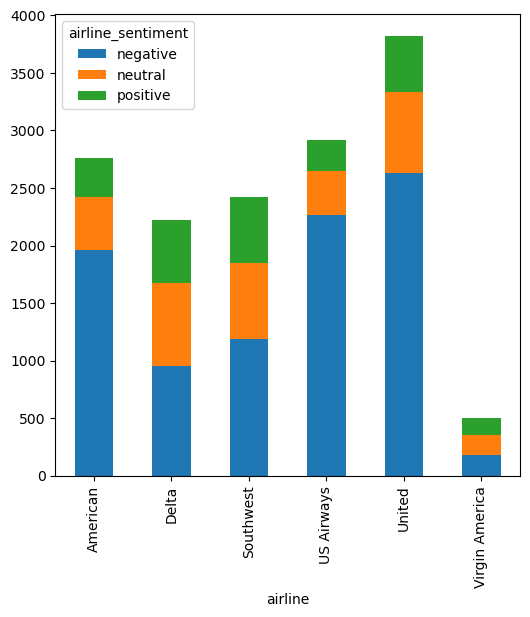

In [45]:
#figsize bar ka shape badha ya kaam kar sakta hai
df_airline=df.groupby(['airline','airline_sentiment']).size()
df_airline.unstack().plot(kind='bar',stacked=True,figsize=(6,6))

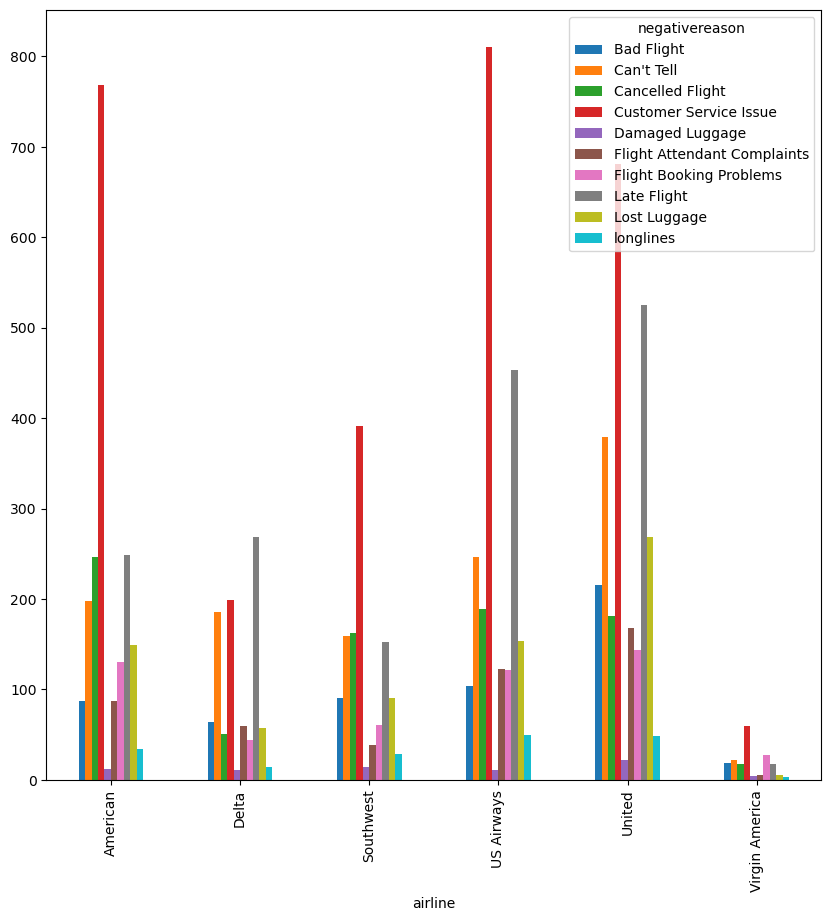

In [46]:
df_neg=df.groupby(['airline'])['negativereason'].value_counts(ascending=True)
df_neg.unstack().plot(kind='bar',figsize=(10,10))
plt.show()

In [47]:
#customer service issue is the main reason for their negative sentiments except for Delta and Virgin
#late flight is the reason for delta flights

In [48]:
df

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24,NaN,Eastern Time (US & Canada)
1,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24,NaN,Pacific Time (US & Canada)
2,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24,Lets Play,Central Time (US & Canada)
3,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24,NaN,Pacific Time (US & Canada)
4,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...
14635,positive,0.3487,NaN,0.0000,American,KristenReenders,0,@AmericanAir thank you we got on a different f...,2015-02-22,NaN,NaN
14636,negative,1.0000,Customer Service Issue,1.0000,American,itsropes,0,@AmericanAir leaving over 20 minutes Late Flig...,2015-02-22,Texas,NaN
14637,neutral,1.0000,NaN,NaN,American,sanyabun,0,@AmericanAir Please bring American Airlines to...,2015-02-22,"Nigeria,lagos",NaN
14638,negative,1.0000,Customer Service Issue,0.6659,American,SraJackson,0,"@AmericanAir you have my money, you change my ...",2015-02-22,New Jersey,Eastern Time (US & Canada)


In [49]:
#data wise analysis for the sentiment
#negative sentiments are associated with dates or not
df['tweet_created'].value_counts()

2015-02-22    3079
2015-02-23    3028
2015-02-21    1557
2015-02-20    1500
2015-02-17    1408
2015-02-19    1376
2015-02-24    1344
2015-02-18    1344
2015-02-16       4
Name: tweet_created, dtype: int64

In [50]:
date_date=df.groupby(['tweet_created','airline','airline_sentiment']).size()

In [51]:
date_date

tweet_created  airline         airline_sentiment
2015-02-16     Delta           negative               1
                               neutral                1
               United          negative               2
2015-02-17     Delta           negative             108
                               neutral               86
                                                   ... 
2015-02-24     United          neutral               49
                               positive              25
               Virgin America  negative              10
                               neutral                6
                               positive              13
Length: 136, dtype: int64

<Axes: xlabel='tweet_created,airline'>

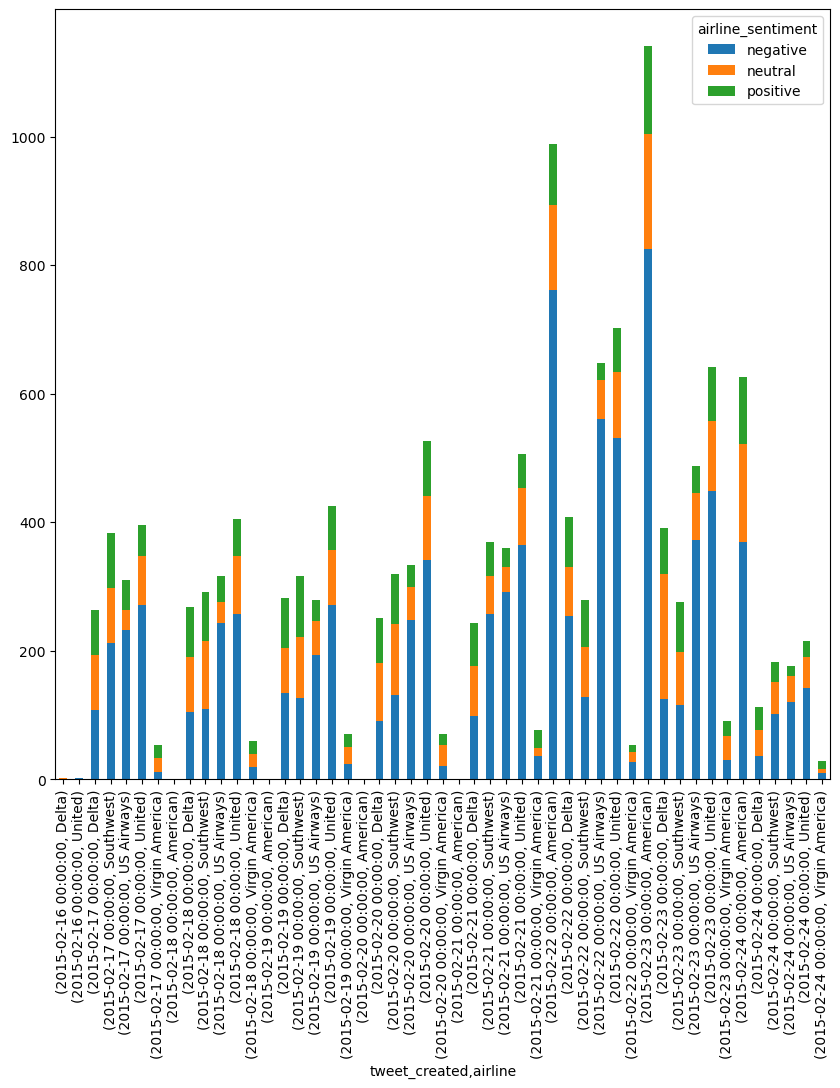

In [52]:
#stacked=true sai positive,negative,neutral yai saab eak kai aupar eak aa jyange
date_date.unstack().plot(kind='bar',stacked=True,figsize=(10,10))

In [53]:
#aab df_ne airline sentiment of 'negative' ko hi show karaga
df_ne=df[df['airline_sentiment']=='negative']
df_ne

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
3,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24,NaN,Pacific Time (US & Canada)
4,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24,NaN,Pacific Time (US & Canada)
5,negative,1.0000,Can't Tell,0.6842,Virgin America,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,2015-02-24,NaN,Pacific Time (US & Canada)
15,negative,0.6842,Late Flight,0.3684,Virgin America,smartwatermelon,0,@VirginAmerica SFO-PDX schedule is still MIA.,2015-02-24,"palo alto, ca",Pacific Time (US & Canada)
17,negative,1.0000,Bad Flight,1.0000,Virgin America,heatherovieda,0,@VirginAmerica I flew from NYC to SFO last we...,2015-02-24,this place called NYC,Eastern Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...
14631,negative,1.0000,Bad Flight,1.0000,American,MDDavis7,0,@AmericanAir thx for nothing on getting us out...,2015-02-22,US,Eastern Time (US & Canada)
14633,negative,1.0000,Cancelled Flight,1.0000,American,RussellsWriting,0,@AmericanAir my flight was Cancelled Flightled...,2015-02-22,Los Angeles,Arizona
14634,negative,0.6684,Late Flight,0.6684,American,GolfWithWoody,0,@AmericanAir right on cue with the delays👌,2015-02-22,NaN,Quito
14636,negative,1.0000,Customer Service Issue,1.0000,American,itsropes,0,@AmericanAir leaving over 20 minutes Late Flig...,2015-02-22,Texas,NaN


In [54]:
#aab dekh sakte hai ki airline_sentiment mai bass -->'negative' show ho raha hai
day_air_neg=df_ne.groupby(['tweet_created','airline','airline_sentiment']).size()
day_air_neg

tweet_created  airline         airline_sentiment
2015-02-16     Delta           negative               1
               United          negative               2
2015-02-17     Delta           negative             108
               Southwest       negative             213
               US Airways      negative             233
               United          negative             272
               Virgin America  negative              12
2015-02-18     American        negative               1
               Delta           negative             105
               Southwest       negative             110
               US Airways      negative             244
               United          negative             257
               Virgin America  negative              19
2015-02-19     Delta           negative             135
               Southwest       negative             127
               US Airways      negative             193
               United          negative             272

In [55]:
df_air_ne=day_air_neg.groupby(['tweet_created','airline']).sum()
df_air_ne

tweet_created  airline       
2015-02-16     Delta               1
               United              2
2015-02-17     Delta             108
               Southwest         213
               US Airways        233
               United            272
               Virgin America     12
2015-02-18     American            1
               Delta             105
               Southwest         110
               US Airways        244
               United            257
               Virgin America     19
2015-02-19     Delta             135
               Southwest         127
               US Airways        193
               United            272
               Virgin America     24
2015-02-20     American            1
               Delta              91
               Southwest         132
               US Airways        248
               United            342
               Virgin America     21
2015-02-21     American            1
               Delta              98
        

<Axes: xlabel='tweet_created'>

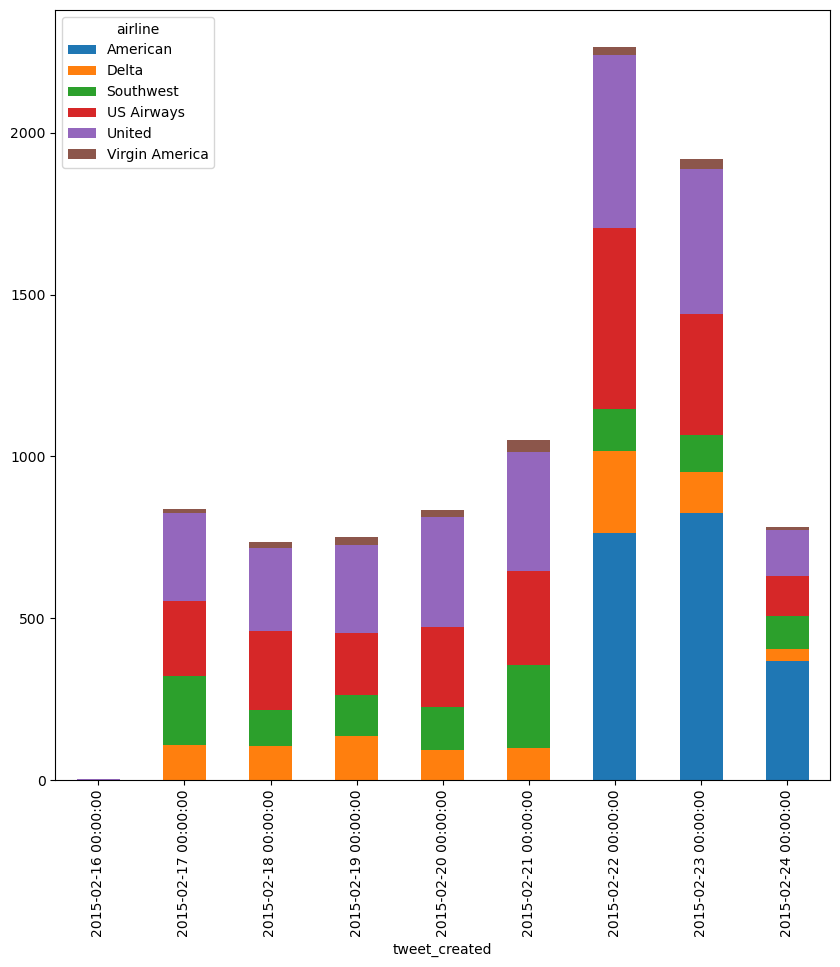

In [56]:
df_air_ne.unstack().plot(kind='bar',stacked=True,figsize=(10,10))

In [57]:
df

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24,NaN,Eastern Time (US & Canada)
1,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24,NaN,Pacific Time (US & Canada)
2,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24,Lets Play,Central Time (US & Canada)
3,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24,NaN,Pacific Time (US & Canada)
4,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...
14635,positive,0.3487,NaN,0.0000,American,KristenReenders,0,@AmericanAir thank you we got on a different f...,2015-02-22,NaN,NaN
14636,negative,1.0000,Customer Service Issue,1.0000,American,itsropes,0,@AmericanAir leaving over 20 minutes Late Flig...,2015-02-22,Texas,NaN
14637,neutral,1.0000,NaN,NaN,American,sanyabun,0,@AmericanAir Please bring American Airlines to...,2015-02-22,"Nigeria,lagos",NaN
14638,negative,1.0000,Customer Service Issue,0.6659,American,SraJackson,0,"@AmericanAir you have my money, you change my ...",2015-02-22,New Jersey,Eastern Time (US & Canada)


In [58]:
df_positive_sent=df[df['airline_sentiment']=='positive']
df_positive_sent

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
1,positive,0.3486,NaN,0.0,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24,NaN,Pacific Time (US & Canada)
6,positive,0.6745,NaN,0.0,Virgin America,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",2015-02-24,San Francisco CA,Pacific Time (US & Canada)
8,positive,0.6559,NaN,NaN,Virgin America,dhepburn,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",2015-02-24,San Diego,Pacific Time (US & Canada)
9,positive,1.0000,NaN,NaN,Virgin America,YupitsTate,0,"@VirginAmerica it was amazing, and arrived an ...",2015-02-24,Los Angeles,Eastern Time (US & Canada)
11,positive,1.0000,NaN,NaN,Virgin America,HyperCamiLax,0,@VirginAmerica I &lt;3 pretty graphics. so muc...,2015-02-24,NYC,America/New_York
...,...,...,...,...,...,...,...,...,...,...,...
14623,positive,0.6274,NaN,0.0,American,Flora_Lola_NYC,0,@AmericanAir Love the new planes for the JFK-L...,2015-02-22,NaN,Eastern Time (US & Canada)
14625,positive,1.0000,NaN,NaN,American,DrCaseyJRudkin,0,@AmericanAir Flight 236 was great. Fantastic c...,2015-02-22,East Coast,NaN
14628,positive,1.0000,NaN,NaN,American,jlhalldc,0,Thank you. “@AmericanAir: @jlhalldc Customer R...,2015-02-22,"Washington, DC",Eastern Time (US & Canada)
14630,positive,1.0000,NaN,NaN,American,Laurelinesblog,0,@AmericanAir Thanks! He is.,2015-02-22,"Chapel Hill, NC",NaN


In [59]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [60]:
from wordcloud import WordCloud,STOPWORDS

In [61]:
paragraph_words=' '.join(df_positive_sent['text'])
paragraph_words

'@VirginAmerica plus you\'ve added commercials to the experience... tacky. @VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :) @virginamerica Well, I didn\'t…but NOW I DO! :-D @VirginAmerica it was amazing, and arrived an hour early. You\'re too good to me. @VirginAmerica I &lt;3 pretty graphics. so much better than minimal iconography. :D @VirginAmerica This is such a great deal! Already thinking about my 2nd trip to @Australia &amp; I haven\'t even gone on my 1st trip yet! ;p @VirginAmerica @virginmedia I\'m flying your #fabulous #Seductive skies again! U take all the #stress away from travel http://t.co/ahlXHhKiyn @VirginAmerica Thanks! @VirginAmerica So excited for my first cross country flight LAX to MCO I\'ve heard nothing but great things about Virgin America. #29DaysToGo I ❤️ flying @VirginAmerica. ☺️👍 @VirginAmerica you know what would be amazingly awesome? BOS-FLL PLEASE!!!!!!! I want to fly with only you. @VirginAmerica I love this graphic. http:/

In [62]:
words_pos=[]
for word in paragraph_words.split():
    if 'http' not in word and not word.startswith('@') and word !='RT':
        words_pos.append(word)

In [63]:
words_pos

['plus',
 "you've",
 'added',
 'commercials',
 'to',
 'the',
 'experience...',
 'tacky.',
 'yes,',
 'nearly',
 'every',
 'time',
 'I',
 'fly',
 'VX',
 'this',
 '“ear',
 'worm”',
 'won’t',
 'go',
 'away',
 ':)',
 'Well,',
 'I',
 "didn't…but",
 'NOW',
 'I',
 'DO!',
 ':-D',
 'it',
 'was',
 'amazing,',
 'and',
 'arrived',
 'an',
 'hour',
 'early.',
 "You're",
 'too',
 'good',
 'to',
 'me.',
 'I',
 '&lt;3',
 'pretty',
 'graphics.',
 'so',
 'much',
 'better',
 'than',
 'minimal',
 'iconography.',
 ':D',
 'This',
 'is',
 'such',
 'a',
 'great',
 'deal!',
 'Already',
 'thinking',
 'about',
 'my',
 '2nd',
 'trip',
 'to',
 '&amp;',
 'I',
 "haven't",
 'even',
 'gone',
 'on',
 'my',
 '1st',
 'trip',
 'yet!',
 ';p',
 "I'm",
 'flying',
 'your',
 '#fabulous',
 '#Seductive',
 'skies',
 'again!',
 'U',
 'take',
 'all',
 'the',
 '#stress',
 'away',
 'from',
 'travel',
 'Thanks!',
 'So',
 'excited',
 'for',
 'my',
 'first',
 'cross',
 'country',
 'flight',
 'LAX',
 'to',
 'MCO',
 "I've",
 'heard',
 'noth

In [64]:
final_words="".join(words_pos)
final_words

'plusyou\'veaddedcommercialstotheexperience...tacky.yes,nearlyeverytimeIflyVXthis“earworm”won’tgoaway:)Well,Ididn\'t…butNOWIDO!:-Ditwasamazing,andarrivedanhourearly.You\'retoogoodtome.I&lt;3prettygraphics.somuchbetterthanminimaliconography.:DThisissuchagreatdeal!Alreadythinkingaboutmy2ndtripto&amp;Ihaven\'tevengoneonmy1sttripyet!;pI\'mflyingyour#fabulous#Seductiveskiesagain!Utakeallthe#stressawayfromtravelThanks!SoexcitedformyfirstcrosscountryflightLAXtoMCOI\'veheardnothingbutgreatthingsaboutVirginAmerica.#29DaysToGoI❤️flying☺️👍youknowwhatwouldbeamazinglyawesome?BOS-FLLPLEASE!!!!!!!Iwanttoflywithonlyyou.Ilovethisgraphic.Ilovethehipsterinnovation.Youareafeelgoodbrand.thisisgreatnews!AmericacouldstartflightstoHawaiibyendofyearviaMoodlightingistheonlywaytofly!BestexperienceEVER!Coolandcalming.💜✈#MoodlitMondayDoneanddone!Bestairlinearound,handsdown!ViewofdowntownLosAngeles,theHollywoodSign,andbeyondthatraininthemountains!I\'m#elevategoldforagoodreason:yourock!!wowthisjustblewmymindJulieAnd

In [65]:
wc=WordCloud(stopwords=STOPWORDS,background_color='white',width=2000,height=2000).generate(final_words)

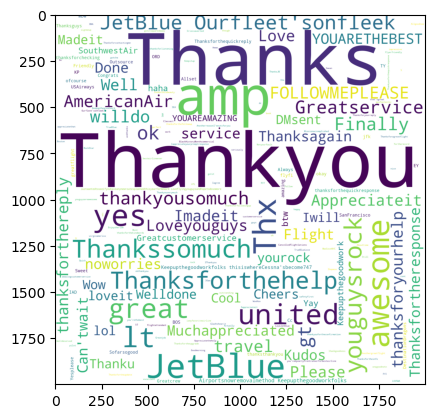

In [66]:
plt.imshow(wc)

In [67]:
#wordcloud for negative word

In [68]:
df_neg=df[df['airline_sentiment']=='negative']

In [69]:
para_new=' '.join(df_neg['text'])

In [70]:
word_negative=[]
for word in para_new.split():
    if 'http' not in word and not word.startswith('@') and word !='RT':
        word_negative.append(word)

In [71]:
word_negative

["it's",
 'really',
 'aggressive',
 'to',
 'blast',
 'obnoxious',
 '"entertainment"',
 'in',
 'your',
 "guests'",
 'faces',
 '&amp;',
 'they',
 'have',
 'little',
 'recourse',
 'and',
 "it's",
 'a',
 'really',
 'big',
 'bad',
 'thing',
 'about',
 'it',
 'seriously',
 'would',
 'pay',
 '$30',
 'a',
 'flight',
 'for',
 'seats',
 'that',
 "didn't",
 'have',
 'this',
 'playing.',
 "it's",
 'really',
 'the',
 'only',
 'bad',
 'thing',
 'about',
 'flying',
 'VA',
 'SFO-PDX',
 'schedule',
 'is',
 'still',
 'MIA.',
 'I',
 'flew',
 'from',
 'NYC',
 'to',
 'SFO',
 'last',
 'week',
 'and',
 "couldn't",
 'fully',
 'sit',
 'in',
 'my',
 'seat',
 'due',
 'to',
 'two',
 'large',
 'gentleman',
 'on',
 'either',
 'side',
 'of',
 'me.',
 'HELP!',
 'why',
 'are',
 'your',
 'first',
 'fares',
 'in',
 'May',
 'over',
 'three',
 'times',
 'more',
 'than',
 'other',
 'carriers',
 'when',
 'all',
 'seats',
 'are',
 'available',
 'to',
 'select???',
 'you',
 'guys',
 'messed',
 'up',
 'my',
 'seating..',
 'I',

In [72]:
f_neg=''.join(word_negative)
f_neg

'it\'sreallyaggressivetoblastobnoxious"entertainment"inyourguests\'faces&amp;theyhavelittlerecourseandit\'sareallybigbadthingaboutitseriouslywouldpay$30aflightforseatsthatdidn\'thavethisplaying.it\'sreallytheonlybadthingaboutflyingVASFO-PDXscheduleisstillMIA.IflewfromNYCtoSFOlastweekandcouldn\'tfullysitinmyseatduetotwolargegentlemanoneithersideofme.HELP!whyareyourfirstfaresinMayoverthreetimesmorethanothercarrierswhenallseatsareavailabletoselect???youguysmessedupmyseating..Ireservedseatingwithmyfriendsandyouguysgavemyseataway...😡Iwantfreeinternetstatusmatchprogram.Iappliedandit\'sbeenthreeweeks.Calledandemailedwithnoresponse.Whathappened2urveganfoodoptions?!AtleastsayonursitesoiknowIwon\'tbeable2eatanythingfornext6hrs#failamazingtomethatwecan\'tgetanycoldairfromthevents.#VX358#noair#worstflightever#roasted#SFOtoBOShi!Ijustbkedacoolbirthdaytripwithyou,butican\'taddmyelevateno.causeienteredmymiddlenameduringFlightBookingProblems😢help,leftexpensiveheadphonesonflight89IADtoLAXtoday.Seat2A.N

In [73]:
wc=WordCloud(stopwords=STOPWORDS,background_color='white',width=2000,height=2000).generate(f_neg)

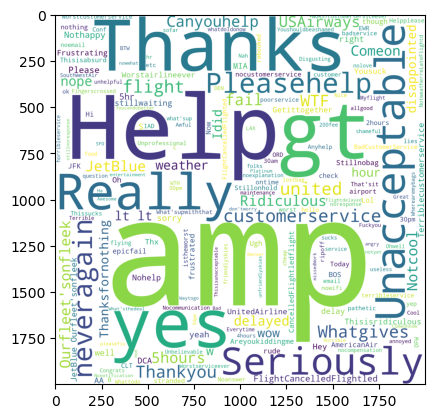

In [74]:
plt.imshow(wc)

In [75]:
df.drop(df.loc[df['airline_sentiment']=='neutral'].index,axis=0,inplace=True)

In [76]:
df

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
1,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24,NaN,Pacific Time (US & Canada)
3,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24,NaN,Pacific Time (US & Canada)
4,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24,NaN,Pacific Time (US & Canada)
5,negative,1.0000,Can't Tell,0.6842,Virgin America,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,2015-02-24,NaN,Pacific Time (US & Canada)
6,positive,0.6745,NaN,0.0000,Virgin America,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",2015-02-24,San Francisco CA,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...
14633,negative,1.0000,Cancelled Flight,1.0000,American,RussellsWriting,0,@AmericanAir my flight was Cancelled Flightled...,2015-02-22,Los Angeles,Arizona
14634,negative,0.6684,Late Flight,0.6684,American,GolfWithWoody,0,@AmericanAir right on cue with the delays👌,2015-02-22,NaN,Quito
14635,positive,0.3487,NaN,0.0000,American,KristenReenders,0,@AmericanAir thank you we got on a different f...,2015-02-22,NaN,NaN
14636,negative,1.0000,Customer Service Issue,1.0000,American,itsropes,0,@AmericanAir leaving over 20 minutes Late Flig...,2015-02-22,Texas,NaN


In [77]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
df['airline_sentiment_code']=lr.fit_transform(df['airline_sentiment'])

In [78]:
#preprocessing of the text data
#eisme jo airline sentiment positive and negative ko airline sentiment code mai convert kar diya gaya hai ie 0 and 1
df

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,airline_sentiment_code
1,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24,NaN,Pacific Time (US & Canada),1
3,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24,NaN,Pacific Time (US & Canada),0
4,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24,NaN,Pacific Time (US & Canada),0
5,negative,1.0000,Can't Tell,0.6842,Virgin America,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,2015-02-24,NaN,Pacific Time (US & Canada),0
6,positive,0.6745,NaN,0.0000,Virgin America,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",2015-02-24,San Francisco CA,Pacific Time (US & Canada),1
...,...,...,...,...,...,...,...,...,...,...,...,...
14633,negative,1.0000,Cancelled Flight,1.0000,American,RussellsWriting,0,@AmericanAir my flight was Cancelled Flightled...,2015-02-22,Los Angeles,Arizona,0
14634,negative,0.6684,Late Flight,0.6684,American,GolfWithWoody,0,@AmericanAir right on cue with the delays👌,2015-02-22,NaN,Quito,0
14635,positive,0.3487,NaN,0.0000,American,KristenReenders,0,@AmericanAir thank you we got on a different f...,2015-02-22,NaN,NaN,1
14636,negative,1.0000,Customer Service Issue,1.0000,American,itsropes,0,@AmericanAir leaving over 20 minutes Late Flig...,2015-02-22,Texas,NaN,0


In [79]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [80]:
from nltk.corpus import stopwords
import nltk

In [81]:
nltk.download('stopwords')
print(set(stopwords.words('english')))
# i have just showed the words present in english language in stopwords 

{'d', 'an', 'wouldn', "mightn't", 'my', 'should', 'shan', "won't", 'isn', 'couldn', 'had', 'of', 'where', 'why', 'own', 'then', 't', 'ain', 'because', 'above', 'weren', 'has', 'so', 'against', "hadn't", 'on', 's', 'only', 'i', 'm', 'off', 'wasn', 'such', 'we', 'than', 'for', 'under', "you'd", 'our', 'aren', 'what', 'very', "shouldn't", 'am', 'theirs', "you'll", 'shouldn', 'hers', 'that', "doesn't", 'same', 'who', 'himself', 'over', "that'll", 'up', 'some', 'it', 'having', 've', 'mustn', "you're", 'hasn', 'is', 'too', 'which', 'and', 're', 'ours', "wasn't", 'do', "hasn't", 'here', 'mightn', 'their', 'out', 'both', 'all', 'yours', 'there', 'other', "shan't", 'how', 'more', 'now', "couldn't", "haven't", 'again', 'nor', 'but', 'will', 'him', 'haven', 'by', 'are', "didn't", "isn't", 'from', 'those', 'o', 'any', "mustn't", 'y', 'yourselves', 'as', 'below', 'a', 'when', "you've", 'these', 'can', 'they', 'did', "aren't", 'most', 'doing', "don't", 'does', 'just', 'she', 'won', 'herself', "she's

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [82]:
import re

a="@VirginAmerica plus you've added commercials"
data=re.sub('[^a-zA-Z]',' ',a).split()
stops={'you','ve'}
for i in data:
    if i not in stops:
        print(i)

VirginAmerica
plus
added
commercials


In [83]:
df['text']

1        @VirginAmerica plus you've added commercials t...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
5        @VirginAmerica seriously would pay $30 a fligh...
6        @VirginAmerica yes, nearly every time I fly VX...
                               ...                        
14633    @AmericanAir my flight was Cancelled Flightled...
14634           @AmericanAir right on cue with the delays👌
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14638    @AmericanAir you have my money, you change my ...
Name: text, Length: 11541, dtype: object

In [84]:
def tweet_clean(x):
    #pattern matching
    letter_only=re.sub('[^a-zA-Z]',' ',x)
    #convert into lower case and using split function we shall get words separately
    words=letter_only.lower().split()
    #get the set of uniform stopwords
    stops=set(stopwords.words('english'))
    meaningful_words=[i for i in words if i not in stops]
    return (' '.join(meaningful_words))

In [85]:
df['clean_text']=df['text'].apply(tweet_clean)

In [86]:
df['clean_text']

1        virginamerica plus added commercials experienc...
3        virginamerica really aggressive blast obnoxiou...
4                       virginamerica really big bad thing
5        virginamerica seriously would pay flight seats...
6        virginamerica yes nearly every time fly vx ear...
                               ...                        
14633    americanair flight cancelled flightled leaving...
14634                         americanair right cue delays
14635       americanair thank got different flight chicago
14636    americanair leaving minutes late flight warnin...
14638    americanair money change flight answer phones ...
Name: clean_text, Length: 11541, dtype: object

In [87]:
#text,independent
x=df['clean_text']

In [88]:
#target
y=df['airline_sentiment']

In [89]:
len(x)

11541

In [90]:
len(y)

11541

In [91]:
#split into train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3)

In [92]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(8078,)
(8078,)
(3463,)
(3463,)


In [93]:
X_train

4886     southwestair heart cp status sure would nice t...
4256        united plane coming delayed almost hours plane
12919    americanair wife flt bro tul via dfw cancelled...
1215     united trying make change reservations getting...
6452                                    southwestair thank
                               ...                        
9419     usairways seat flight last night worst seat ev...
5290     southwestair since become ok passenger save ro...
4203     expiring united offer buy transfer united mile...
1123     united pointless tweet least americanair asked...
8793     jetblue dropping passengers small baby infants...
Name: clean_text, Length: 8078, dtype: object

In [94]:
#count vectorizer
#using it to extract important features from the text data
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(stop_words='english',max_features=100)
X_train_new=cv.fit_transform(X_train)
X_test_new=cv.fit_transform(X_test)

In [95]:
X_train_new

<8078x100 sparse matrix of type '<class 'numpy.int64'>'
	with 30177 stored elements in Compressed Sparse Row format>

In [96]:
X_test_new

<3463x100 sparse matrix of type '<class 'numpy.int64'>'
	with 12959 stored elements in Compressed Sparse Row format>

In [97]:
#logestic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train_new,Y_train)

LogisticRegression()

In [98]:
y_pred=lr.predict(X_test_new)

In [99]:
Y_test

5204     negative
8917     positive
8883     negative
7349     negative
13695    negative
           ...   
5868     negative
7952     positive
13846    negative
12997    negative
6807     positive
Name: airline_sentiment, Length: 3463, dtype: object

In [100]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

    negative       0.82      0.93      0.87      2721
    positive       0.49      0.25      0.33       742

    accuracy                           0.78      3463
   macro avg       0.65      0.59      0.60      3463
weighted avg       0.75      0.78      0.76      3463



In [101]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train_new,Y_train)

SVC()

In [102]:
Y_p=sv.predict(X_test_new)
Y_p

array(['negative', 'negative', 'negative', ..., 'negative', 'positive',
       'negative'], dtype=object)

In [103]:
print('Classification report for SVC Model')
print(classification_report(Y_test,Y_p))

Classification report for SVC Model
              precision    recall  f1-score   support

    negative       0.82      0.94      0.88      2721
    positive       0.53      0.24      0.33       742

    accuracy                           0.79      3463
   macro avg       0.67      0.59      0.60      3463
weighted avg       0.76      0.79      0.76      3463



In [104]:
#gaussian naive bayes--> where my features have continuous values or real values
#multinominal naive bayes
#bernouli naive bayes
#iris data
#sl sw pl pw iris-flower(target)

In [108]:
from sklearn.naive_bayes import MultinomialNB
mn = MultinomialNB()
mn.fit(X_train_new,Y_train)

MultinomialNB()

In [109]:
y_m=mn.predict(X_test_new)

In [110]:
print('Classification report for SVC Model')
print(classification_report(Y_test,y_m))

Classification report for SVC Model
              precision    recall  f1-score   support

    negative       0.82      0.94      0.88      2721
    positive       0.53      0.26      0.35       742

    accuracy                           0.79      3463
   macro avg       0.67      0.60      0.61      3463
weighted avg       0.76      0.79      0.76      3463



In [111]:
from sklearn.naive_bayes import BernoulliNB
bn=BernoulliNB()
bn.fit(X_train_new,Y_train)

BernoulliNB()

In [112]:
b_m=bn.predict(X_test_new)

In [113]:
print('Classification report for SVC Model')
print(classification_report(Y_test,b_m))

Classification report for SVC Model
              precision    recall  f1-score   support

    negative       0.83      0.92      0.87      2721
    positive       0.49      0.29      0.36       742

    accuracy                           0.78      3463
   macro avg       0.66      0.60      0.62      3463
weighted avg       0.75      0.78      0.76      3463



In [114]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(lr,X_train_new,Y_train,cv=5).mean())
print(cross_val_score(lr,X_test_new,Y_test,cv=5).mean())

0.8819010360788401
0.8715032238153626


In [117]:
print(cross_val_score(sv,X_train_new,Y_train,cv=5).mean())
print(cross_val_score(sv,X_test_new,Y_test,cv=5).mean())

0.8788067467737486
0.8677497518537981


In [118]:
print(cross_val_score(mn,X_train_new,Y_train,cv=5).mean())
print(cross_val_score(mn,X_test_new,Y_test,cv=5).mean())

0.8773205253961928
0.8700593882674807


In [120]:
print(cross_val_score(bn,X_train_new,Y_train,cv=5).mean())
print(cross_val_score(bn,X_test_new,Y_test,cv=5).mean())

0.8685301014621587
0.8665949336469568
